In [134]:
# import data
import pandas as pd
df = pd.read_csv('uk_air_passengers.csv', sep=';')
print('UK Air Passengers :')
print(df.iloc[0:5])

UK Air Passengers :
         Date  month  year  weekdays  calendardays  weekends  Passengers
0  01. Jan 05      1  2005        22            30         8     5141123
1  01. Feb 05      2  2005        21            28         7     4753591
2  01. Mar 05      3  2005        24            30         6     5708627
3  01. Apr 05      4  2005        22            30         8     5573022
4  01. May 05      5  2005        22            30         8     5636621


In [135]:
df['datetime']=pd.to_datetime(df['Date'])

In [136]:
df=df.drop_duplicates(subset=['datetime'])
print(len(df))

210


In [137]:
df=df.dropna()
print(df.shape)

(210, 8)


In [138]:
df=df.set_index('datetime')

In [139]:
# 1. What is the average number of passengers per month?
avg_passengers_per_day = round(df['Passengers'].mean())
print('The average number of passengers per day is', avg_passengers_per_day)

The average number of passengers per day is 5440152


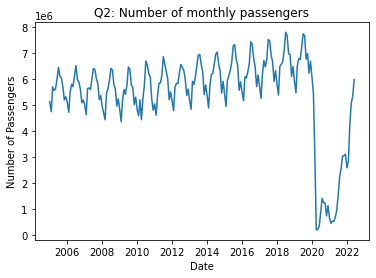

In [140]:
# 2. Plot the number of monthly passengers?
import matplotlib.pyplot as plt
plt.plot(df.index, df['Passengers'])
plt.xlabel('Date')
plt.ylabel('Number of Passengers')
plt.title('Q2: Number of monthly passengers')
plt.show()

In [141]:
df[df['Passengers']<4000000]

,Date,month,year,weekdays,calendardays,weekends,Passengers
datetime,,,,,,,
2020-03-01,01. Mar 20,3,2020,22,30,8,3106845
2020-04-01,01. Apr 20,4,2020,23,30,7,206600
2020-05-01,01. May 20,5,2020,22,30,8,228018
2020-06-01,01. Jun 20,6,2020,22,30,8,350283
2020-07-01,01. Jul 20,7,2020,24,30,6,866655
2020-08-01,01. Aug 20,8,2020,22,30,8,1418683
2020-09-01,01. Sep 20,9,2020,23,30,7,1256479
2020-10-01,01. Oct 20,10,2020,23,30,7,1245624
2020-11-01,01. Nov 20,11,2020,21,30,9,746954


In [142]:
x=df['Passengers'].min()
df.loc[df['Passengers'] == x]

,Date,month,year,weekdays,calendardays,weekends,Passengers
datetime,,,,,,,
2020-04-01,01. Apr 20,4,2020,23,30,7,206600


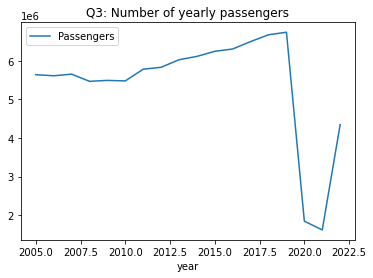

In [143]:
# 3. Plot the number of yearly passengers?
df_grouped = df.groupby('year')
df_mean = df_grouped.mean('Passengers')
df_mean.plot(kind='line', y='Passengers')
plt.title('Q3: Number of yearly passengers')
plt.show()

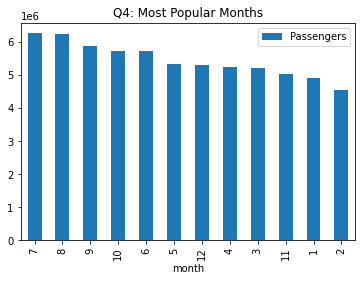

In [144]:
# 4. Rank the months by the number of passengers (Bar Chart)
df_grouped = df.groupby('month')
df_mean = df_grouped.mean('Passengers')
df_sorted = df_mean.sort_values(by='Passengers', ascending=False)
df_sorted.plot(kind='bar', y='Passengers')
plt.title('Q4: Most Popular Months')
plt.show()

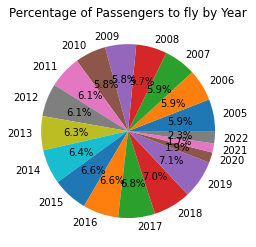

In [145]:
# 5. Percentage of Passengers to fly by Year (Pie Chart)
df_grouped = df.groupby('year').sum()
plt.pie(df_grouped['Passengers'], labels=df_grouped.index, autopct='%1.1f%%')
plt.title('Percentage of Passengers to fly by Year')
plt.show()

In [146]:
# 6. Display the 3 months with the highest number of passengers
df_grouped = df.groupby('month')
df_mean = df_grouped.mean('Passengers')
df_sorted = round(df_mean.sort_values(by='Passengers', ascending=False),)
print('The 3 months with the highest number of passengers are: ')
print(df_sorted.head(3))

The 3 months with the highest number of passengers are: 
         year  weekdays  calendardays  weekends  Passengers
month                                                      
7      2013.0      23.0          30.0       7.0   6268299.0
8      2013.0      23.0          30.0       7.0   6234627.0
9      2013.0      22.0          30.0       8.0   5860992.0


In [147]:
# 7. Display the 3 months with the lowest number of passengers
df_grouped = df.groupby('month')
df_mean = df_grouped.mean('Passengers')
df_sorted = round(df_mean.sort_values(by='Passengers', ascending=True),)
print('The 3 months with the lowest number of passengers are: ')
print(df_sorted.head(3))

The 3 months with the lowest number of passengers are: 
         year  weekdays  calendardays  weekends  Passengers
month                                                      
2      2014.0      21.0          28.0       7.0   4556349.0
1      2014.0      23.0          30.0       7.0   4917144.0
11     2013.0      22.0          30.0       8.0   5037722.0


# Covid Data

In [148]:
def get_covid_data():
  response=requests.get('https://api.coronavirus.data.gov.uk/v1/data')
  data=response.json()
  return data

In [149]:
import requests
data = get_covid_data()

In [150]:
# Convert list of dictionaries to DateFrame
df_covid=pd.DataFrame(data['data'])
df_covid.tail()

,date,areaName,areaCode,confirmedRate,latestBy,confirmed,deathNew,death,deathRate
836,2020-02-04,United Kingdom,K02000001,NaN,0,2,NaN,NaN,NaN
837,2020-02-03,United Kingdom,K02000001,NaN,0,2,NaN,NaN,NaN
838,2020-02-02,United Kingdom,K02000001,NaN,0,2,NaN,NaN,NaN
839,2020-02-01,United Kingdom,K02000001,NaN,0,2,NaN,NaN,NaN
840,2020-01-31,United Kingdom,K02000001,NaN,2,2,NaN,NaN,NaN


In [151]:
# Using NumPy to check for Null values
len(df_covid['confirmedRate'].isnull())

841

In [152]:
df_covid=df_covid[['date','latestBy']]
df_covid['datetime']=pd.to_datetime(df_covid['date'])
df_covid=df_covid.set_index('datetime')
df_covid=df_covid.groupby(pd.Grouper(freq='MS')).mean()
df_covid

,latestBy
datetime,
2020-01-01,2.000000
2020-02-01,0.724138
2020-03-01,822.516129
2020-04-01,4857.933333
2020-05-01,3397.225806
2020-06-01,1238.900000
2020-07-01,644.548387
2020-08-01,1050.935484
2020-09-01,3913.200000


In [153]:
# Removing Null Vales'NaN'
df_covid=round(df_covid.dropna(),)
df_covid

,latestBy
datetime,
2020-01-01,2.0
2020-02-01,1.0
2020-03-01,823.0
2020-04-01,4858.0
2020-05-01,3397.0
2020-06-01,1239.0
2020-07-01,645.0
2020-08-01,1051.0
2020-09-01,3913.0


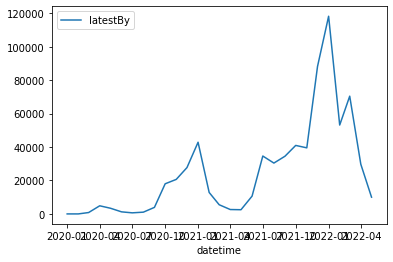

In [154]:
import seaborn as sns
sns.lineplot(data=df_covid)

In [155]:
df_merged=pd.merge(df,df_covid,on='datetime')[['Passengers','latestBy']]
df_merged

,Passengers,latestBy
datetime,,
2020-01-01,6099370,2.0
2020-02-01,5442081,1.0
2020-03-01,3106845,823.0
2020-04-01,206600,4858.0
2020-05-01,228018,3397.0
2020-06-01,350283,1239.0
2020-07-01,866655,645.0
2020-08-01,1418683,1051.0
2020-09-01,1256479,3913.0


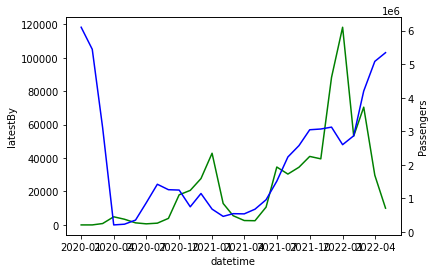

In [156]:
# sns.lineplot(data=df_merged)
import matplotlib.pyplot as plt
sns.lineplot(data=df_merged['latestBy'], color="g")
ax2 = plt.twinx()
sns.lineplot(data=df_merged['Passengers'], color="b", ax=ax2)


In [157]:
for i, row in enumerate(df_merged.itertuples(), 1):
    print(f'flights: {row.Passengers} Covid Cases: {row.latestBy}')

flights: 6099370 Covid Cases: 2.0
flights: 5442081 Covid Cases: 1.0
flights: 3106845 Covid Cases: 823.0
flights: 206600 Covid Cases: 4858.0
flights: 228018 Covid Cases: 3397.0
flights: 350283 Covid Cases: 1239.0
flights: 866655 Covid Cases: 645.0
flights: 1418683 Covid Cases: 1051.0
flights: 1256479 Covid Cases: 3913.0
flights: 1245624 Covid Cases: 18014.0
flights: 746954 Covid Cases: 20643.0
flights: 1143417 Covid Cases: 27714.0
flights: 677356 Covid Cases: 42852.0
flights: 461188 Covid Cases: 12835.0
flights: 541669 Covid Cases: 5492.0
flights: 536039 Covid Cases: 2623.0
flights: 675214 Covid Cases: 2507.0
flights: 956689 Covid Cases: 10638.0
flights: 1510845 Covid Cases: 34611.0
flights: 2232326 Covid Cases: 30400.0
flights: 2571199 Covid Cases: 34497.0
flights: 3043258 Covid Cases: 40953.0
flights: 3065774 Covid Cases: 39504.0
flights: 3121588 Covid Cases: 88182.0
flights: 2598556 Covid Cases: 118187.0
flights: 2863496 Covid Cases: 53142.0
flights: 4196656 Covid Cases: 70400.0
flig